In [1]:
import ROOT
import sys
import numpy as np
import csv

incsvRoster="Run27_list.csv"

Welcome to JupyROOT 6.26/00


In [2]:
def unpackData(a,n):
    b=[a[i:i+n] for i in range(0, len(a), n)]
    # print(b)
    
    phaL={}
    phaH={}
    k=int(len(a)/n)
    
    for i in range(k):
        m=int(i)
        phaL[int(b[m][0])]=int(b[m][2])
        phaH[int(b[m][0])]=int(b[m][3])
        
    # print("phaL=",phaL)
    # print("phaH=",phaH)
    return phaL,phaH

In [3]:
h1={}
h2={}
hp={}

oname="histFile01.root"
ofile=ROOT.TFile(oname,"RECREATE")

nbins=200
xmin=0.0
xmax=5000.0

for i in range(64):
    s="ToA_"+str(i)
    h1[s]=ROOT.TH1D(s,s,nbins,xmin,xmax)

def processRosterList():
    ncount=0
    elist=""
    with open(incsvRoster,"r") as csvfile:
        reader=csv.reader(csvfile)
        for ix, row in enumerate(reader):
            print(ix,"  ",type(row),"  ",row)
            if ix<4:
                continue
            if ix > 20:
                break
            if "0x20" in row:
                print(row)
                continue
            ncount=ncount+1
            boardID=row[0]
            tStamp=row[1]
            nHits=row[2]
            ToA,ToT=unpackData(row[3:],4)
            print("ToA=",ToA)
            print("ToT=",ToT)
            # print(type(phaL[0]))
            print(ToA.keys())
            for key in ToA:
                print(key)
                print(type(key))
                s="ToA_"+str(key)
                print("s=",s)
                h1[s].Fill(ToA[key])
            
processRosterList()
ofile.Write()

0    <class 'list'>    ['Timing mode']
1    <class 'list'>    ['ToA/ToT LSB value = 0.5 ns ']
2    <class 'list'>    ['Time unit = LSB ']
3    <class 'list'>    ['Board_Id', 'TStamp', 'num_hits', 'CH_Id', 'data_type', 'ToA_LSB', 'ToT_LSB ']
4    <class 'list'>    ['0', '40.432000', '3', '60', '0x30', '100', '234', '8', '0x30', '1026', '20', '41', '0x30', '1432', '17']
ToA= {60: 100, 8: 1026, 41: 1432}
ToT= {60: 234, 8: 20, 41: 17}
dict_keys([60, 8, 41])
60
<class 'int'>
s= ToA_60
8
<class 'int'>
s= ToA_8
41
<class 'int'>
s= ToA_41
5    <class 'list'>    ['0', '1040.432000', '1', '60', '0x30', '100', '230']
ToA= {60: 100}
ToT= {60: 230}
dict_keys([60])
60
<class 'int'>
s= ToA_60
6    <class 'list'>    ['0', '2040.432000', '3', '50', '0x30', '266', '20', '60', '0x30', '100', '236', '1', '0x30', '1767', '13']
ToA= {50: 266, 60: 100, 1: 1767}
ToT= {50: 20, 60: 236, 1: 13}
dict_keys([50, 60, 1])
50
<class 'int'>
s= ToA_50
60
<class 'int'>
s= ToA_60
1
<class 'int'>
s= ToA_1
7    <class 'list

18027

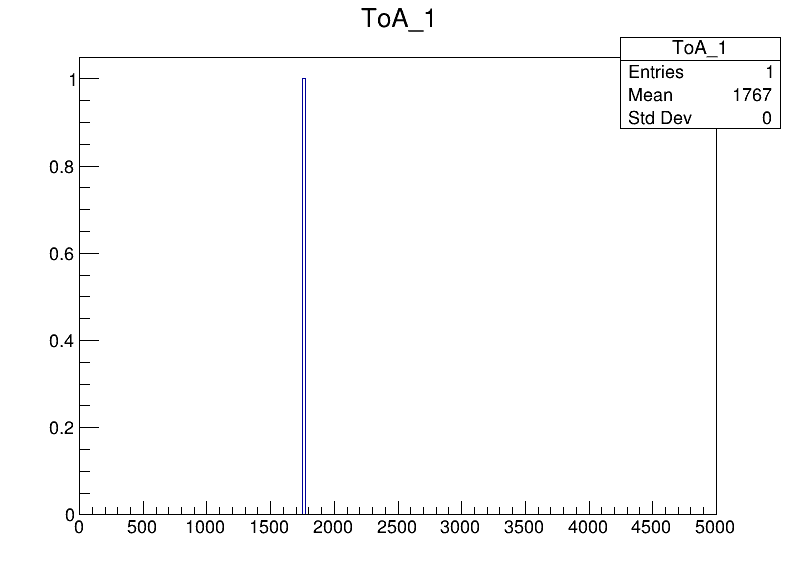

In [4]:
c1 = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
s="ToA_"+str(1)
h1[s].Draw()
c1.Draw()